In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [11]:
import yfinance as yf

start = '2010-01-01'
end = '2020-01-01'

df = yf.download('AAPL', start=start, end=end)
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440332  6.455078  6.391280  6.422878  493729600
2010-01-05  6.451465  6.487878  6.417459  6.458085  601904800
2010-01-06  6.348848  6.477047  6.342227  6.451467  552160000
2010-01-07  6.337111  6.379844  6.291068  6.372321  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800


In [13]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-24,68.823029,68.973140,68.496193,68.924716,48478800
2019-12-26,70.188515,70.205464,68.927152,68.956204,93121200
2019-12-27,70.161865,71.171444,69.755132,70.481445,146266000
2019-12-30,70.578278,70.861543,69.053023,70.079543,144114400
2019-12-31,71.093971,71.101234,70.094079,70.193342,100805600


In [15]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440332,6.455078,6.391280,6.422878,493729600
1,2010-01-05,6.451465,6.487878,6.417459,6.458085,601904800
2,2010-01-06,6.348848,6.477047,6.342227,6.451467,552160000
3,2010-01-07,6.337111,6.379844,6.291068,6.372321,477131200
4,2010-01-08,6.379241,6.379843,6.291368,6.328683,447610800


In [19]:
df = df.drop(['Date'], axis=1)
df.head()

C:\Users\sakshyam\AppData\Local\Temp\ipykernel_8184\2218488136.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440332,6.455078,6.391280,6.422878,493729600
1,6.451465,6.487878,6.417459,6.458085,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337111,6.379844,6.291068,6.372321,477131200
4,6.379241,6.379843,6.291368,6.328683,447610800


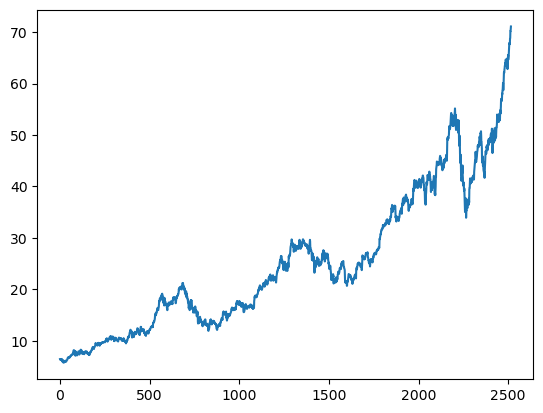

In [29]:
plt.plot(df.Close)

In [31]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440332,6.455078,6.391280,6.422878,493729600
1,6.451465,6.487878,6.417459,6.458085,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337111,6.379844,6.291068,6.372321,477131200
4,6.379241,6.379843,6.291368,6.328683,447610800
...,...,...,...,...,...
2511,68.823029,68.973140,68.496193,68.924716,48478800
2512,70.188515,70.205464,68.927152,68.956204,93121200
2513,70.161865,71.171444,69.755132,70.481445,146266000


In [37]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,57.410470
2512,57.647438
2513,57.875338
2514,58.102497


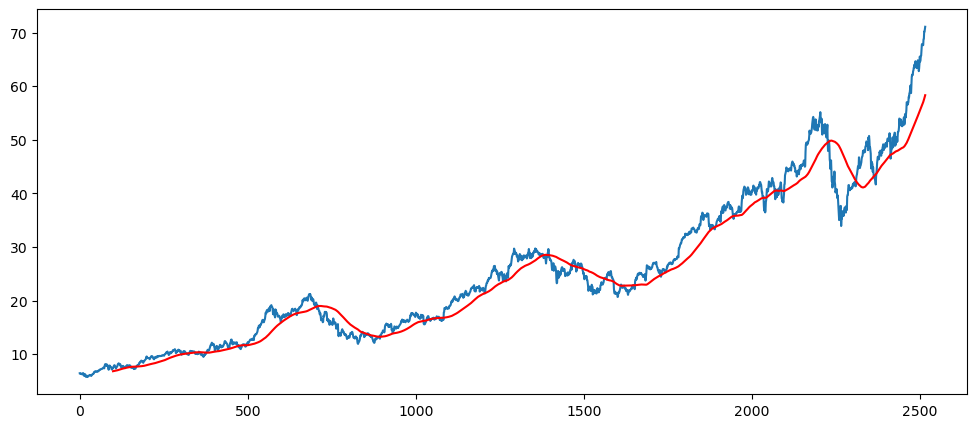

In [47]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [49]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2511,52.291901
2512,52.425206
2513,52.555959
2514,52.685931


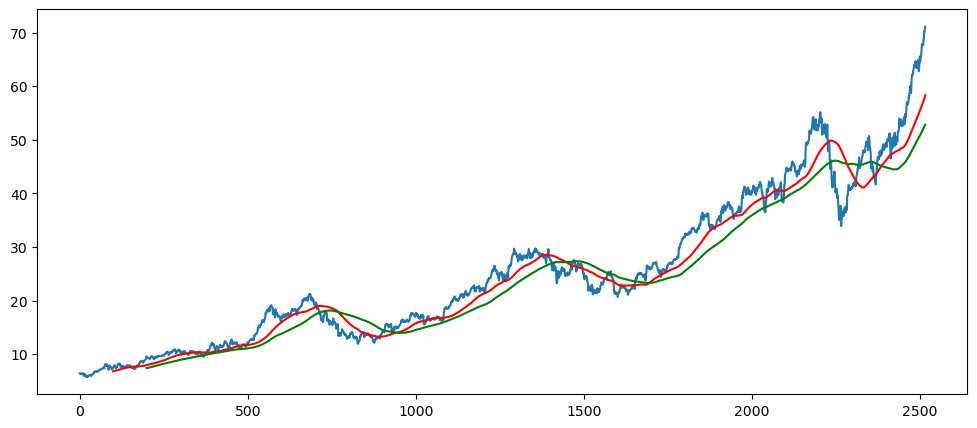

In [51]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [53]:
df.shape

(2516, 5)

In [59]:
#splitting the data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [63]:
data_testing.head()

Ticker,AAPL
1761,26.786110
1762,26.862427
1763,26.832363
1764,26.968805
1765,27.269464


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [71]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02760004],
       [0.02806497],
       [0.02377927],
       ...,
       [0.89123181],
       [0.8864021 ],
       [0.88611238]])

In [73]:
data_training_array.shape

(1761, 1)

In [77]:
x_train = []
y_train = []

for i in range(100 , data_training.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i,0])

x_train , y_train = np.array(x_train), np.array(y_train)